In [1]:
import pandas as pd
from pandas import json_normalize
import json
import numpy as np

df_one = pd.read_json("../src/scripts/square-grid-geojson-correct.json")
df_one['grid1'] = 'grid1'
df_one = df_one.pivot(index="grid1",columns="key",values="value").reset_index().add_prefix('correct_grid_one_')
df_one.rename(columns={list(df_one)[0]:'grid1'}, inplace=True)

df_second = pd.read_json("../src/scripts/square-grid-geojson-second-correct.json")
df_second['grid2'] = 'grid2'
df_second = df_second.pivot(index="grid2",columns="key",values="value").reset_index().add_prefix('correct_grid_two_')
df_second.rename(columns={list(df_second)[0]:'grid2'}, inplace=True)

df_third = pd.read_json("../src/scripts/square-grid-geojson-third-correct.json")
df_third['grid3'] = 'grid3'
df_third = df_third.pivot(index="grid3",columns="key",values="value").reset_index().add_prefix('correct_grid_three_')
df_third.rename(columns={list(df_third)[0]:'grid3'}, inplace=True)

df = pd.read_csv("data/change-study-data-normalized.csv")
df = df.groupby(['uuid', 'category', 'data']).first().reset_index()
df = df.pivot_table(index=['uuid'],columns=['category'],values=['data'], aggfunc='first')
df.to_csv('data/cleaned_normalized_data_temp.csv')
df = pd.read_csv("data/cleaned_normalized_data_temp.csv")
df.iloc[0]
df.columns = df.iloc[0]
df = df[2:]
df['uuid'] = df['category']
df = df.dropna(subset=['gridanswers'])
df = df.dropna(subset=['susanswers'])
# df = df.dropna(subset=['map-version'])
df['index'] = np.arange(len(df))

#grid answers
dictValuesDF = df['gridanswers'].apply(json.loads)
dictValuesDFList = list(dictValuesDF)
data = dictValuesDFList
sdf = pd.Series(data, name='gridanswers').to_frame()
sdf['index'] = np.arange(len(sdf))
sdf = pd.DataFrame(dict(
    index=sdf.index.values.repeat(sdf['gridanswers'].str.len()),
)).join(pd.DataFrame(sdf['gridanswers'].sum()))
sdf['value'] = np.where(sdf['value'] > 0, 1, 0)
sdf = sdf.pivot(index="index",columns="key",values="value").reset_index().add_prefix('submitted_grid_')
sdf.rename(columns={list(sdf)[0]:'index'}, inplace=True)
df = df.join(sdf,on='index',how='left', rsuffix='_right')

#sus answers
dictValuesDF = df['susanswers'].apply(json.loads)
dictValuesDFList = list(dictValuesDF)
data = dictValuesDFList
sdf = pd.Series(data, name='susanswers').to_frame()
sdf['index'] = np.arange(len(sdf))
sdf = pd.DataFrame(dict(
    index=sdf.index.values.repeat(sdf['susanswers'].str.len()),
)).join(pd.DataFrame(sdf['susanswers'].sum()))
sdf = sdf.pivot(index="index",columns="key",values="questionAnswer").reset_index().add_prefix('submitted_sus_')
sdf.rename(columns={list(sdf)[0]:'index'}, inplace=True)
df = df.join(sdf,on='index',how='left', rsuffix='_right')
del df['index_right']

df['grid1'] = 'grid1'
df['grid2'] = 'grid2'
df['grid3'] = 'grid3'

df = pd.merge(df, df_one, left_on="grid1", right_on="grid1", how="left", validate="m:1")
df = pd.merge(df, df_second, left_on="grid2", right_on="grid2", how="left", validate="m:1")
df = pd.merge(df, df_third, left_on="grid3", right_on="grid3", how="left", validate="m:1")

# df['map-version'] = np.where(df['map-version']==,0,df['map-version'])
values = {'map-version': 999}
df = df.fillna(values)
df['map-version'] = df['map-version'].astype(int)

df['iscorrect_grid_box_01'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-1'] == df['correct_grid_one_grid-box-1'], np.where(df['map-version']==1, df['submitted_grid_grid-box-1'] == df['correct_grid_two_grid-box-1'], np.where(df['map-version']==2, df['submitted_grid_grid-box-1'] == df['correct_grid_three_grid-box-1'], '')))
df['iscorrect_grid_box_02'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-2'] == df['correct_grid_one_grid-box-2'], np.where(df['map-version']==1, df['submitted_grid_grid-box-2'] == df['correct_grid_two_grid-box-2'], np.where(df['map-version']==2, df['submitted_grid_grid-box-2'] == df['correct_grid_three_grid-box-2'], '')))
df['iscorrect_grid_box_03'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-3'] == df['correct_grid_one_grid-box-3'], np.where(df['map-version']==1, df['submitted_grid_grid-box-3'] == df['correct_grid_two_grid-box-3'], np.where(df['map-version']==2, df['submitted_grid_grid-box-3'] == df['correct_grid_three_grid-box-3'], '')))
df['iscorrect_grid_box_04'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-4'] == df['correct_grid_one_grid-box-4'], np.where(df['map-version']==1, df['submitted_grid_grid-box-4'] == df['correct_grid_two_grid-box-4'], np.where(df['map-version']==2, df['submitted_grid_grid-box-4'] == df['correct_grid_three_grid-box-4'], '')))
df['iscorrect_grid_box_05'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-5'] == df['correct_grid_one_grid-box-5'], np.where(df['map-version']==1, df['submitted_grid_grid-box-5'] == df['correct_grid_two_grid-box-5'], np.where(df['map-version']==2, df['submitted_grid_grid-box-5'] == df['correct_grid_three_grid-box-5'], '')))
df['iscorrect_grid_box_06'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-6'] == df['correct_grid_one_grid-box-6'], np.where(df['map-version']==1, df['submitted_grid_grid-box-6'] == df['correct_grid_two_grid-box-6'], np.where(df['map-version']==2, df['submitted_grid_grid-box-6'] == df['correct_grid_three_grid-box-6'], '')))
df['iscorrect_grid_box_07'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-7'] == df['correct_grid_one_grid-box-7'], np.where(df['map-version']==1, df['submitted_grid_grid-box-7'] == df['correct_grid_two_grid-box-7'], np.where(df['map-version']==2, df['submitted_grid_grid-box-7'] == df['correct_grid_three_grid-box-7'], '')))
df['iscorrect_grid_box_08'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-8'] == df['correct_grid_one_grid-box-8'], np.where(df['map-version']==1, df['submitted_grid_grid-box-8'] == df['correct_grid_two_grid-box-8'], np.where(df['map-version']==2, df['submitted_grid_grid-box-8'] == df['correct_grid_three_grid-box-8'], '')))
df['iscorrect_grid_box_09'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-9'] == df['correct_grid_one_grid-box-9'], np.where(df['map-version']==1, df['submitted_grid_grid-box-9'] == df['correct_grid_two_grid-box-9'], np.where(df['map-version']==2, df['submitted_grid_grid-box-9'] == df['correct_grid_three_grid-box-9'], '')))

df['iscorrect_grid_box_10'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-10'] == df['correct_grid_one_grid-box-10'], np.where(df['map-version']==1, df['submitted_grid_grid-box-10'] == df['correct_grid_two_grid-box-10'], np.where(df['map-version']==2, df['submitted_grid_grid-box-10'] == df['correct_grid_three_grid-box-10'], '')))
df['iscorrect_grid_box_11'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-11'] == df['correct_grid_one_grid-box-11'], np.where(df['map-version']==1, df['submitted_grid_grid-box-11'] == df['correct_grid_two_grid-box-11'], np.where(df['map-version']==2, df['submitted_grid_grid-box-11'] == df['correct_grid_three_grid-box-11'], '')))
df['iscorrect_grid_box_12'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-12'] == df['correct_grid_one_grid-box-12'], np.where(df['map-version']==1, df['submitted_grid_grid-box-12'] == df['correct_grid_two_grid-box-12'], np.where(df['map-version']==2, df['submitted_grid_grid-box-12'] == df['correct_grid_three_grid-box-12'], '')))
df['iscorrect_grid_box_13'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-13'] == df['correct_grid_one_grid-box-13'], np.where(df['map-version']==1, df['submitted_grid_grid-box-13'] == df['correct_grid_two_grid-box-13'], np.where(df['map-version']==2, df['submitted_grid_grid-box-13'] == df['correct_grid_three_grid-box-13'], '')))
df['iscorrect_grid_box_14'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-14'] == df['correct_grid_one_grid-box-14'], np.where(df['map-version']==1, df['submitted_grid_grid-box-14'] == df['correct_grid_two_grid-box-14'], np.where(df['map-version']==2, df['submitted_grid_grid-box-14'] == df['correct_grid_three_grid-box-14'], '')))
df['iscorrect_grid_box_15'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-15'] == df['correct_grid_one_grid-box-15'], np.where(df['map-version']==1, df['submitted_grid_grid-box-15'] == df['correct_grid_two_grid-box-15'], np.where(df['map-version']==2, df['submitted_grid_grid-box-15'] == df['correct_grid_three_grid-box-15'], '')))
df['iscorrect_grid_box_16'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-16'] == df['correct_grid_one_grid-box-16'], np.where(df['map-version']==1, df['submitted_grid_grid-box-16'] == df['correct_grid_two_grid-box-16'], np.where(df['map-version']==2, df['submitted_grid_grid-box-16'] == df['correct_grid_three_grid-box-16'], '')))
df['iscorrect_grid_box_17'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-17'] == df['correct_grid_one_grid-box-17'], np.where(df['map-version']==1, df['submitted_grid_grid-box-17'] == df['correct_grid_two_grid-box-17'], np.where(df['map-version']==2, df['submitted_grid_grid-box-17'] == df['correct_grid_three_grid-box-17'], '')))
df['iscorrect_grid_box_18'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-18'] == df['correct_grid_one_grid-box-18'], np.where(df['map-version']==1, df['submitted_grid_grid-box-18'] == df['correct_grid_two_grid-box-18'], np.where(df['map-version']==2, df['submitted_grid_grid-box-18'] == df['correct_grid_three_grid-box-18'], '')))
df['iscorrect_grid_box_19'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-19'] == df['correct_grid_one_grid-box-19'], np.where(df['map-version']==1, df['submitted_grid_grid-box-19'] == df['correct_grid_two_grid-box-19'], np.where(df['map-version']==2, df['submitted_grid_grid-box-19'] == df['correct_grid_three_grid-box-19'], '')))

df['iscorrect_grid_box_20'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-20'] == df['correct_grid_one_grid-box-20'], np.where(df['map-version']==1, df['submitted_grid_grid-box-20'] == df['correct_grid_two_grid-box-20'], np.where(df['map-version']==2, df['submitted_grid_grid-box-20'] == df['correct_grid_three_grid-box-20'], '')))
df['iscorrect_grid_box_21'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-21'] == df['correct_grid_one_grid-box-21'], np.where(df['map-version']==1, df['submitted_grid_grid-box-21'] == df['correct_grid_two_grid-box-21'], np.where(df['map-version']==2, df['submitted_grid_grid-box-21'] == df['correct_grid_three_grid-box-21'], '')))
df['iscorrect_grid_box_22'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-22'] == df['correct_grid_one_grid-box-22'], np.where(df['map-version']==1, df['submitted_grid_grid-box-22'] == df['correct_grid_two_grid-box-22'], np.where(df['map-version']==2, df['submitted_grid_grid-box-22'] == df['correct_grid_three_grid-box-22'], '')))
df['iscorrect_grid_box_23'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-23'] == df['correct_grid_one_grid-box-23'], np.where(df['map-version']==1, df['submitted_grid_grid-box-23'] == df['correct_grid_two_grid-box-23'], np.where(df['map-version']==2, df['submitted_grid_grid-box-23'] == df['correct_grid_three_grid-box-23'], '')))
df['iscorrect_grid_box_24'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-24'] == df['correct_grid_one_grid-box-24'], np.where(df['map-version']==1, df['submitted_grid_grid-box-24'] == df['correct_grid_two_grid-box-24'], np.where(df['map-version']==2, df['submitted_grid_grid-box-24'] == df['correct_grid_three_grid-box-24'], '')))
df['iscorrect_grid_box_25'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-25'] == df['correct_grid_one_grid-box-25'], np.where(df['map-version']==1, df['submitted_grid_grid-box-25'] == df['correct_grid_two_grid-box-25'], np.where(df['map-version']==2, df['submitted_grid_grid-box-25'] == df['correct_grid_three_grid-box-25'], '')))
df['iscorrect_grid_box_26'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-26'] == df['correct_grid_one_grid-box-26'], np.where(df['map-version']==1, df['submitted_grid_grid-box-26'] == df['correct_grid_two_grid-box-26'], np.where(df['map-version']==2, df['submitted_grid_grid-box-26'] == df['correct_grid_three_grid-box-26'], '')))
df['iscorrect_grid_box_27'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-27'] == df['correct_grid_one_grid-box-27'], np.where(df['map-version']==1, df['submitted_grid_grid-box-27'] == df['correct_grid_two_grid-box-27'], np.where(df['map-version']==2, df['submitted_grid_grid-box-27'] == df['correct_grid_three_grid-box-27'], '')))
df['iscorrect_grid_box_28'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-28'] == df['correct_grid_one_grid-box-28'], np.where(df['map-version']==1, df['submitted_grid_grid-box-28'] == df['correct_grid_two_grid-box-28'], np.where(df['map-version']==2, df['submitted_grid_grid-box-28'] == df['correct_grid_three_grid-box-28'], '')))
df['iscorrect_grid_box_29'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-29'] == df['correct_grid_one_grid-box-29'], np.where(df['map-version']==1, df['submitted_grid_grid-box-29'] == df['correct_grid_two_grid-box-29'], np.where(df['map-version']==2, df['submitted_grid_grid-box-29'] == df['correct_grid_three_grid-box-29'], '')))

df['iscorrect_grid_box_30'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-30'] == df['correct_grid_one_grid-box-30'], np.where(df['map-version']==1, df['submitted_grid_grid-box-30'] == df['correct_grid_two_grid-box-30'], np.where(df['map-version']==2, df['submitted_grid_grid-box-30'] == df['correct_grid_three_grid-box-30'], '')))
df['iscorrect_grid_box_31'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-31'] == df['correct_grid_one_grid-box-31'], np.where(df['map-version']==1, df['submitted_grid_grid-box-31'] == df['correct_grid_two_grid-box-31'], np.where(df['map-version']==2, df['submitted_grid_grid-box-31'] == df['correct_grid_three_grid-box-31'], '')))
df['iscorrect_grid_box_32'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-32'] == df['correct_grid_one_grid-box-32'], np.where(df['map-version']==1, df['submitted_grid_grid-box-32'] == df['correct_grid_two_grid-box-32'], np.where(df['map-version']==2, df['submitted_grid_grid-box-32'] == df['correct_grid_three_grid-box-32'], '')))
df['iscorrect_grid_box_33'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-33'] == df['correct_grid_one_grid-box-33'], np.where(df['map-version']==1, df['submitted_grid_grid-box-33'] == df['correct_grid_two_grid-box-33'], np.where(df['map-version']==2, df['submitted_grid_grid-box-33'] == df['correct_grid_three_grid-box-33'], '')))
df['iscorrect_grid_box_34'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-34'] == df['correct_grid_one_grid-box-34'], np.where(df['map-version']==1, df['submitted_grid_grid-box-34'] == df['correct_grid_two_grid-box-34'], np.where(df['map-version']==2, df['submitted_grid_grid-box-34'] == df['correct_grid_three_grid-box-34'], '')))
df['iscorrect_grid_box_35'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-35'] == df['correct_grid_one_grid-box-35'], np.where(df['map-version']==1, df['submitted_grid_grid-box-35'] == df['correct_grid_two_grid-box-35'], np.where(df['map-version']==2, df['submitted_grid_grid-box-35'] == df['correct_grid_three_grid-box-35'], '')))
df['iscorrect_grid_box_36'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-36'] == df['correct_grid_one_grid-box-36'], np.where(df['map-version']==1, df['submitted_grid_grid-box-36'] == df['correct_grid_two_grid-box-36'], np.where(df['map-version']==2, df['submitted_grid_grid-box-36'] == df['correct_grid_three_grid-box-36'], '')))
df['iscorrect_grid_box_37'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-37'] == df['correct_grid_one_grid-box-37'], np.where(df['map-version']==1, df['submitted_grid_grid-box-37'] == df['correct_grid_two_grid-box-37'], np.where(df['map-version']==2, df['submitted_grid_grid-box-37'] == df['correct_grid_three_grid-box-37'], '')))
df['iscorrect_grid_box_38'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-38'] == df['correct_grid_one_grid-box-38'], np.where(df['map-version']==1, df['submitted_grid_grid-box-38'] == df['correct_grid_two_grid-box-38'], np.where(df['map-version']==2, df['submitted_grid_grid-box-38'] == df['correct_grid_three_grid-box-38'], '')))
df['iscorrect_grid_box_39'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-39'] == df['correct_grid_one_grid-box-39'], np.where(df['map-version']==1, df['submitted_grid_grid-box-39'] == df['correct_grid_two_grid-box-39'], np.where(df['map-version']==2, df['submitted_grid_grid-box-39'] == df['correct_grid_three_grid-box-39'], '')))

df['iscorrect_grid_box_40'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-40'] == df['correct_grid_one_grid-box-40'], np.where(df['map-version']==1, df['submitted_grid_grid-box-40'] == df['correct_grid_two_grid-box-40'], np.where(df['map-version']==2, df['submitted_grid_grid-box-40'] == df['correct_grid_three_grid-box-40'], '')))
df['iscorrect_grid_box_41'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-41'] == df['correct_grid_one_grid-box-41'], np.where(df['map-version']==1, df['submitted_grid_grid-box-41'] == df['correct_grid_two_grid-box-41'], np.where(df['map-version']==2, df['submitted_grid_grid-box-41'] == df['correct_grid_three_grid-box-41'], '')))
df['iscorrect_grid_box_42'] = np.where(df['map-version']==0, df['submitted_grid_grid-box-42'] == df['correct_grid_one_grid-box-42'], np.where(df['map-version']==1, df['submitted_grid_grid-box-42'] == df['correct_grid_two_grid-box-42'], np.where(df['map-version']==2, df['submitted_grid_grid-box-42'] == df['correct_grid_three_grid-box-42'], '')))

del  df['correct_grid_one_grid-box-1']
del  df['correct_grid_two_grid-box-1']
del  df['correct_grid_three_grid-box-1']

del  df['correct_grid_one_grid-box-2']
del  df['correct_grid_two_grid-box-2']
del  df['correct_grid_three_grid-box-2']

del  df['correct_grid_one_grid-box-3']
del  df['correct_grid_two_grid-box-3']
del  df['correct_grid_three_grid-box-3']

del  df['correct_grid_one_grid-box-4']
del  df['correct_grid_two_grid-box-4']
del  df['correct_grid_three_grid-box-4']

del  df['correct_grid_one_grid-box-5']
del  df['correct_grid_two_grid-box-5']
del  df['correct_grid_three_grid-box-5']

del  df['correct_grid_one_grid-box-6']
del  df['correct_grid_two_grid-box-6']
del  df['correct_grid_three_grid-box-6']

del  df['correct_grid_one_grid-box-7']
del  df['correct_grid_two_grid-box-7']
del  df['correct_grid_three_grid-box-7']

del  df['correct_grid_one_grid-box-8']
del  df['correct_grid_two_grid-box-8']
del  df['correct_grid_three_grid-box-8']

del  df['correct_grid_one_grid-box-9']
del  df['correct_grid_two_grid-box-9']
del  df['correct_grid_three_grid-box-9']

del  df['correct_grid_one_grid-box-10']
del  df['correct_grid_two_grid-box-10']
del  df['correct_grid_three_grid-box-10']

del  df['correct_grid_one_grid-box-11']
del  df['correct_grid_two_grid-box-11']
del  df['correct_grid_three_grid-box-11']

del  df['correct_grid_one_grid-box-12']
del  df['correct_grid_two_grid-box-12']
del  df['correct_grid_three_grid-box-12']

del  df['correct_grid_one_grid-box-13']
del  df['correct_grid_two_grid-box-13']
del  df['correct_grid_three_grid-box-13']

del  df['correct_grid_one_grid-box-14']
del  df['correct_grid_two_grid-box-14']
del  df['correct_grid_three_grid-box-14']

del  df['correct_grid_one_grid-box-15']
del  df['correct_grid_two_grid-box-15']
del  df['correct_grid_three_grid-box-15']

del  df['correct_grid_one_grid-box-16']
del  df['correct_grid_two_grid-box-16']
del  df['correct_grid_three_grid-box-16']

del  df['correct_grid_one_grid-box-17']
del  df['correct_grid_two_grid-box-17']
del  df['correct_grid_three_grid-box-17']

del  df['correct_grid_one_grid-box-18']
del  df['correct_grid_two_grid-box-18']
del  df['correct_grid_three_grid-box-18']

del  df['correct_grid_one_grid-box-19']
del  df['correct_grid_two_grid-box-19']
del  df['correct_grid_three_grid-box-19']

del  df['correct_grid_one_grid-box-20']
del  df['correct_grid_two_grid-box-20']
del  df['correct_grid_three_grid-box-20']

del  df['correct_grid_one_grid-box-21']
del  df['correct_grid_two_grid-box-21']
del  df['correct_grid_three_grid-box-21']

del  df['correct_grid_one_grid-box-22']
del  df['correct_grid_two_grid-box-22']
del  df['correct_grid_three_grid-box-22']

del  df['correct_grid_one_grid-box-23']
del  df['correct_grid_two_grid-box-23']
del  df['correct_grid_three_grid-box-23']

del  df['correct_grid_one_grid-box-24']
del  df['correct_grid_two_grid-box-24']
del  df['correct_grid_three_grid-box-24']

del  df['correct_grid_one_grid-box-25']
del  df['correct_grid_two_grid-box-25']
del  df['correct_grid_three_grid-box-25']

del  df['correct_grid_one_grid-box-26']
del  df['correct_grid_two_grid-box-26']
del  df['correct_grid_three_grid-box-26']

del  df['correct_grid_one_grid-box-27']
del  df['correct_grid_two_grid-box-27']
del  df['correct_grid_three_grid-box-27']

del  df['correct_grid_one_grid-box-28']
del  df['correct_grid_two_grid-box-28']
del  df['correct_grid_three_grid-box-28']

del  df['correct_grid_one_grid-box-29']
del  df['correct_grid_two_grid-box-29']
del  df['correct_grid_three_grid-box-29']

del  df['correct_grid_one_grid-box-30']
del  df['correct_grid_two_grid-box-30']
del  df['correct_grid_three_grid-box-30']

del  df['correct_grid_one_grid-box-31']
del  df['correct_grid_two_grid-box-31']
del  df['correct_grid_three_grid-box-31']

del  df['correct_grid_one_grid-box-32']
del  df['correct_grid_two_grid-box-32']
del  df['correct_grid_three_grid-box-32']

del  df['correct_grid_one_grid-box-33']
del  df['correct_grid_two_grid-box-33']
del  df['correct_grid_three_grid-box-33']

del  df['correct_grid_one_grid-box-34']
del  df['correct_grid_two_grid-box-34']
del  df['correct_grid_three_grid-box-34']

del  df['correct_grid_one_grid-box-35']
del  df['correct_grid_two_grid-box-35']
del  df['correct_grid_three_grid-box-35']

del  df['correct_grid_one_grid-box-36']
del  df['correct_grid_two_grid-box-36']
del  df['correct_grid_three_grid-box-36']

del  df['correct_grid_one_grid-box-37']
del  df['correct_grid_two_grid-box-37']
del  df['correct_grid_three_grid-box-37']

del  df['correct_grid_one_grid-box-38']
del  df['correct_grid_two_grid-box-38']
del  df['correct_grid_three_grid-box-38']

del  df['correct_grid_one_grid-box-39']
del  df['correct_grid_two_grid-box-39']
del  df['correct_grid_three_grid-box-39']

del  df['correct_grid_one_grid-box-40']
del  df['correct_grid_two_grid-box-40']
del  df['correct_grid_three_grid-box-40']

del  df['correct_grid_one_grid-box-41']
del  df['correct_grid_two_grid-box-41']
del  df['correct_grid_three_grid-box-41']

del  df['correct_grid_one_grid-box-42']
del  df['correct_grid_two_grid-box-42']
del  df['correct_grid_three_grid-box-42']


del  df['submitted_grid_grid-box-0']
del  df['submitted_grid_grid-box-1']
del  df['submitted_grid_grid-box-2']
del  df['submitted_grid_grid-box-3']
del  df['submitted_grid_grid-box-4']
del  df['submitted_grid_grid-box-5']
del  df['submitted_grid_grid-box-6']
del  df['submitted_grid_grid-box-7']
del  df['submitted_grid_grid-box-8']
del  df['submitted_grid_grid-box-9']

del  df['submitted_grid_grid-box-10']
del  df['submitted_grid_grid-box-11']
del  df['submitted_grid_grid-box-12']
del  df['submitted_grid_grid-box-13']
del  df['submitted_grid_grid-box-14']
del  df['submitted_grid_grid-box-15']
del  df['submitted_grid_grid-box-16']
del  df['submitted_grid_grid-box-17']
del  df['submitted_grid_grid-box-18']
del  df['submitted_grid_grid-box-19']

del  df['submitted_grid_grid-box-20']
del  df['submitted_grid_grid-box-21']
del  df['submitted_grid_grid-box-22']
del  df['submitted_grid_grid-box-23']
del  df['submitted_grid_grid-box-24']
del  df['submitted_grid_grid-box-25']
del  df['submitted_grid_grid-box-26']
del  df['submitted_grid_grid-box-27']
del  df['submitted_grid_grid-box-28']
del  df['submitted_grid_grid-box-29']
                                     
del  df['submitted_grid_grid-box-30']
del  df['submitted_grid_grid-box-31']
del  df['submitted_grid_grid-box-32']
del  df['submitted_grid_grid-box-33']
del  df['submitted_grid_grid-box-34']
del  df['submitted_grid_grid-box-35']
del  df['submitted_grid_grid-box-36']
del  df['submitted_grid_grid-box-37']
del  df['submitted_grid_grid-box-38']
del  df['submitted_grid_grid-box-39']

                                                                          
del  df['submitted_grid_grid-box-40']
del  df['submitted_grid_grid-box-41']
del  df['submitted_grid_grid-box-42']


df['sus-score'] = ((df['submitted_sus_sus-question-1'] - 1) +  
                    (5 - df['submitted_sus_sus-question-2']) +
                    (df['submitted_sus_sus-question-3'] - 1) + 
                    (5 - df['submitted_sus_sus-question-4']) +
                    (df['submitted_sus_sus-question-5'] - 1) + 
                    (5 - df['submitted_sus_sus-question-6']) +
                    (df['submitted_sus_sus-question-7'] - 1) + 
                    (5 - df['submitted_sus_sus-question-8']) +
                    (df['submitted_sus_sus-question-9'] - 1) +
                    (5 - df['submitted_sus_sus-question-10'])) * 2.5


def parse(b):
    return b == "True"

df['percent-correct'] = ((parse(df['iscorrect_grid_box_01']).astype(int) + 
                     parse(df['iscorrect_grid_box_02']).astype(int) + 
                     parse(df['iscorrect_grid_box_03']).astype(int) + 
                     parse(df['iscorrect_grid_box_04']).astype(int) + 
                     parse(df['iscorrect_grid_box_05']).astype(int) + 
                     parse(df['iscorrect_grid_box_06']).astype(int) + 
                     parse(df['iscorrect_grid_box_07']).astype(int) + 
                     parse(df['iscorrect_grid_box_08']).astype(int) + 
                     parse(df['iscorrect_grid_box_09']).astype(int) + 
                     parse(df['iscorrect_grid_box_10']).astype(int) + 
                     parse(df['iscorrect_grid_box_11']).astype(int) + 
                     parse(df['iscorrect_grid_box_12']).astype(int) + 
                     parse(df['iscorrect_grid_box_13']).astype(int) + 
                     parse(df['iscorrect_grid_box_14']).astype(int) + 
                     parse(df['iscorrect_grid_box_15']).astype(int) + 
                     parse(df['iscorrect_grid_box_16']).astype(int) + 
                     parse(df['iscorrect_grid_box_17']).astype(int) + 
                     parse(df['iscorrect_grid_box_18']).astype(int) + 
                     parse(df['iscorrect_grid_box_19']).astype(int) + 
                     parse(df['iscorrect_grid_box_20']).astype(int) + 
                     parse(df['iscorrect_grid_box_21']).astype(int) + 
                     parse(df['iscorrect_grid_box_22']).astype(int) + 
                     parse(df['iscorrect_grid_box_23']).astype(int) + 
                     parse(df['iscorrect_grid_box_24']).astype(int) + 
                     parse(df['iscorrect_grid_box_25']).astype(int) + 
                     parse(df['iscorrect_grid_box_26']).astype(int) + 
                     parse(df['iscorrect_grid_box_27']).astype(int) + 
                     parse(df['iscorrect_grid_box_28']).astype(int) + 
                     parse(df['iscorrect_grid_box_29']).astype(int) + 
                     parse(df['iscorrect_grid_box_30']).astype(int) + 
                     parse(df['iscorrect_grid_box_31']).astype(int) + 
                     parse(df['iscorrect_grid_box_32']).astype(int) + 
                     parse(df['iscorrect_grid_box_33']).astype(int) + 
                     parse(df['iscorrect_grid_box_34']).astype(int) + 
                     parse(df['iscorrect_grid_box_35']).astype(int) + 
                     parse(df['iscorrect_grid_box_36']).astype(int) + 
                     parse(df['iscorrect_grid_box_37']).astype(int) + 
                     parse(df['iscorrect_grid_box_38']).astype(int) + 
                     parse(df['iscorrect_grid_box_39']).astype(int) + 
                     parse(df['iscorrect_grid_box_40']).astype(int) + 
                     parse(df['iscorrect_grid_box_41']).astype(int) + 
                     parse(df['iscorrect_grid_box_42']).astype(int))/42) * 100

# df['test'] = df['availWidth'].apply(lambda x: 'True' if x <= 450 else 'False') 
# df['mobile'] = df['availWidth'].apply(lambda x: 'True' if x <= 450 else 'False')

# del df['test']

del df['iscorrect_grid_box_01']
del df['iscorrect_grid_box_02']
del df['iscorrect_grid_box_03']
del df['iscorrect_grid_box_04']
del df['iscorrect_grid_box_05']
del df['iscorrect_grid_box_06']
del df['iscorrect_grid_box_07']
del df['iscorrect_grid_box_08']
del df['iscorrect_grid_box_09']
del df['iscorrect_grid_box_10']
del df['iscorrect_grid_box_11']
del df['iscorrect_grid_box_12']
del df['iscorrect_grid_box_13']
del df['iscorrect_grid_box_14']
del df['iscorrect_grid_box_15']
del df['iscorrect_grid_box_16']
del df['iscorrect_grid_box_17']
del df['iscorrect_grid_box_18']
del df['iscorrect_grid_box_19']
del df['iscorrect_grid_box_20']
del df['iscorrect_grid_box_21']
del df['iscorrect_grid_box_22']
del df['iscorrect_grid_box_23']
del df['iscorrect_grid_box_24']
del df['iscorrect_grid_box_25']
del df['iscorrect_grid_box_26']
del df['iscorrect_grid_box_27']
del df['iscorrect_grid_box_28']
del df['iscorrect_grid_box_29']
del df['iscorrect_grid_box_30']
del df['iscorrect_grid_box_31']
del df['iscorrect_grid_box_32']
del df['iscorrect_grid_box_33']
del df['iscorrect_grid_box_34']
del df['iscorrect_grid_box_35']
del df['iscorrect_grid_box_36']
del df['iscorrect_grid_box_37']
del df['iscorrect_grid_box_38']
del df['iscorrect_grid_box_39']
del df['iscorrect_grid_box_40']
del df['iscorrect_grid_box_41']
del df['iscorrect_grid_box_42']


del  df['submitted_sus_sus-question-1']
del  df['submitted_sus_sus-question-2']
del  df['submitted_sus_sus-question-3']
del  df['submitted_sus_sus-question-4']
del  df['submitted_sus_sus-question-5']
del  df['submitted_sus_sus-question-6']
del  df['submitted_sus_sus-question-7']
del  df['submitted_sus_sus-question-8']
del  df['submitted_sus_sus-question-9']
del  df['submitted_sus_sus-question-10']

df['time-taken-minutes']  = ( pd.to_datetime(df['gridanswers-time'].str.replace('T',' ').str.replace('Z','')) - pd.to_datetime(df['study-agreement-time'].str.replace('T',' ').str.replace('Z','')))/np.timedelta64(1,'m')

del df['grid1']
del df['grid2']
del df['grid3']
del df['category']
del df['campaign']
del df['grid-submited']
del df['gridanswers']
del df['is mobile']
# del df['map-version']
# del df['screen size']
del df['study started']
del df['gridanswers-time']
del df['study started time']
del df['study-agreement']
del df['study-completed']
# del df['study-question']
del df['susanswers']
del df['susanswers-submited']
del df['susanswers-time']
del df['study-agreement-time']
del df['index']
del df['undefined']
df = df.dropna()
df = df.drop_duplicates(subset='uuid', keep='first')
df = df.sort_values(by='uuid', ascending=False)
df.to_csv('data/cleaned_normalized_data.csv')



df['study'] = df['study-question'].replace({'0': 'Animate', '1': 'Side by Side', '2': 'Slider'})
df['map'] = df['map-version'].replace({0: 'Party Rock Fire SWIR', 1: 'Landcover', 2: 'Lake Mead'})


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c783f50>]],
      dtype=object)

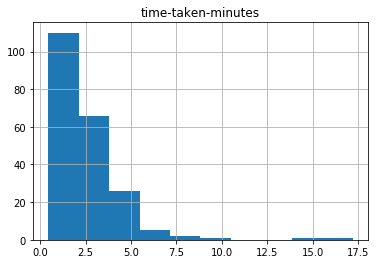

In [3]:
df = df.loc[df['time-taken-minutes'] < 1000]
df = df.loc[df['time-taken-minutes'] > 0]
df.hist('time-taken-minutes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120782b10>]],
      dtype=object)

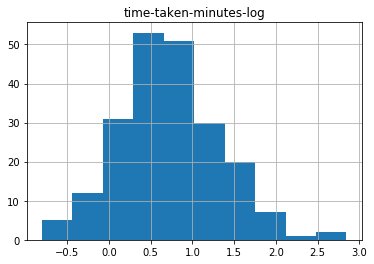

In [4]:
df['time-taken-minutes-log'] =  np.log(df['time-taken-minutes'])
df.hist('time-taken-minutes-log')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122ac5450>]],
      dtype=object)

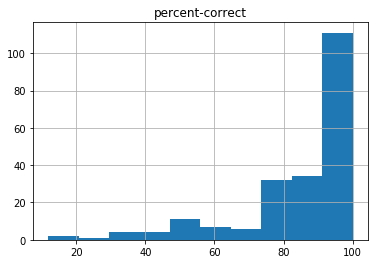

In [5]:
df.hist('percent-correct')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122bb56d0>]],
      dtype=object)

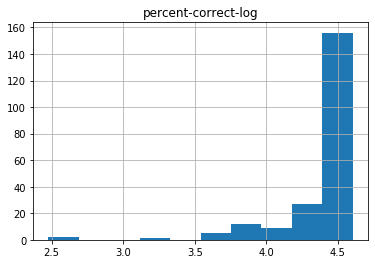

In [6]:
df['percent-correct-log'] = np.log(df['percent-correct'])
df.hist('percent-correct-log') 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122ac5a90>]],
      dtype=object)

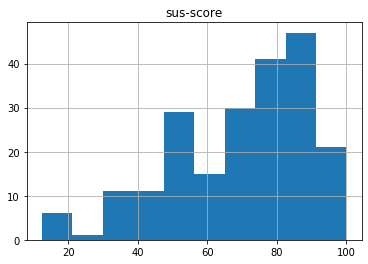

In [7]:
df.hist('sus-score')

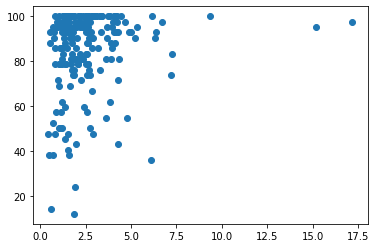

In [8]:
plt.scatter(df['time-taken-minutes'], df['percent-correct'])

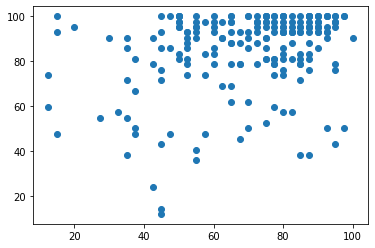

In [9]:
plt.scatter(df['sus-score'], df['percent-correct'])

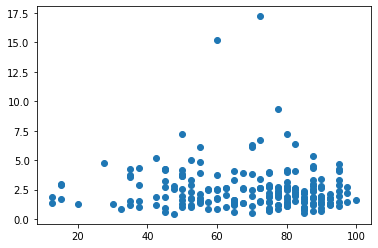

In [10]:
plt.scatter(df['sus-score'], df['time-taken-minutes'])

In [11]:
# Create linear regression object
X = df[['time-taken-minutes']]
Y = df[['percent-correct']]
model_Simple = sm.OLS(Y, X).fit()
model = sm.OLS(Y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percent-correct   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.884
Date:                Sat, 29 Feb 2020   Prob (F-statistic):             0.0282
Time:                        09:28:15   Log-Likelihood:                -910.85
No. Observations:                 212   AIC:                             1826.
Df Residuals:                     210   BIC:                             1832.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 81.3886      2.009     40.509      0.000      77.428      85.349
time-taken-minutes     1.3962      0.632      2.210      0.028       0.151       2.642
==============================================================================
Omnibus:                       71.820   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.376
Skew:                          -1.653   Prob(JB):                     2.22e-33
Kurtosis:                       5.468   Cond. No.                         5.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
X = df[['time-taken-minutes']]
Y = df[['sus-score']]
model_Simple = sm.OLS(Y, X).fit()
model = sm.OLS(Y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sus-score   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7060
Date:                Sat, 29 Feb 2020   Prob (F-statistic):              0.402
Time:                        09:28:15   Log-Likelihood:                -930.37
No. Observations:                 212   AIC:                             1865.
Df Residuals:                     210   BIC:                             1871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 70.7705      2.203     32.125      0.000      66.428      75.113
time-taken-minutes    -0.5821      0.693     -0.840      0.402      -1.948       0.784
==============================================================================
Omnibus:                       18.580   Durbin-Watson:                   1.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.466
Skew:                          -0.779   Prob(JB):                     2.18e-05
Kurtosis:                       3.053   Cond. No.                         5.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
X = df[['time-taken-minutes']]
Y = df[['percent-correct']]
model_Simple = sm.OLS(Y, X).fit()
model = sm.OLS(Y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percent-correct   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     4.884
Date:                Sat, 29 Feb 2020   Prob (F-statistic):             0.0282
Time:                        09:28:15   Log-Likelihood:                -910.85
No. Observations:                 212   AIC:                             1826.
Df Residuals:                     210   BIC:                             1832.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 81.3886      2.009     40.509      0.000      77.428      85.349
time-taken-minutes     1.3962      0.632      2.210      0.028       0.151       2.642
==============================================================================
Omnibus:                       71.820   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.376
Skew:                          -1.653   Prob(JB):                     2.22e-33
Kurtosis:                       5.468   Cond. No.                         5.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

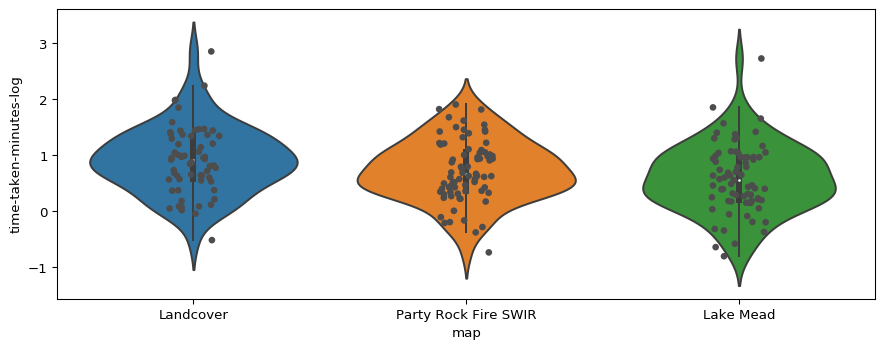

In [14]:
plt.figure(figsize=(11,4), dpi=96)
sns.violinplot(x='map',y='time-taken-minutes-log', data=df)
sns.stripplot(x='map',y='time-taken-minutes-log', color=".3", data=df)

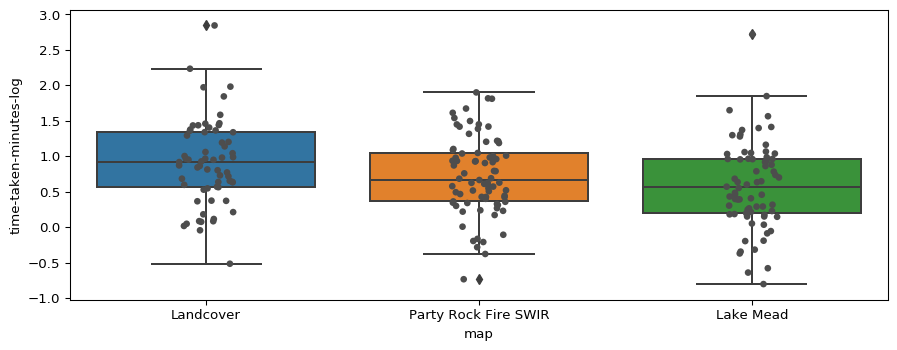

In [15]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='map',y='time-taken-minutes-log', data=df)
sns.stripplot(x='map',y='time-taken-minutes-log', color=".3", data=df)

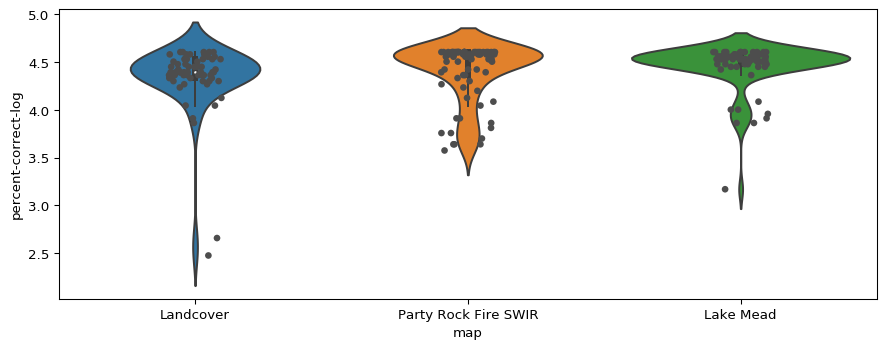

In [16]:
plt.figure(figsize=(11,4), dpi=96)
sns.violinplot(x='map',y='percent-correct-log', data=df)
sns.stripplot(x='map',y='percent-correct-log', color=".3", data=df)

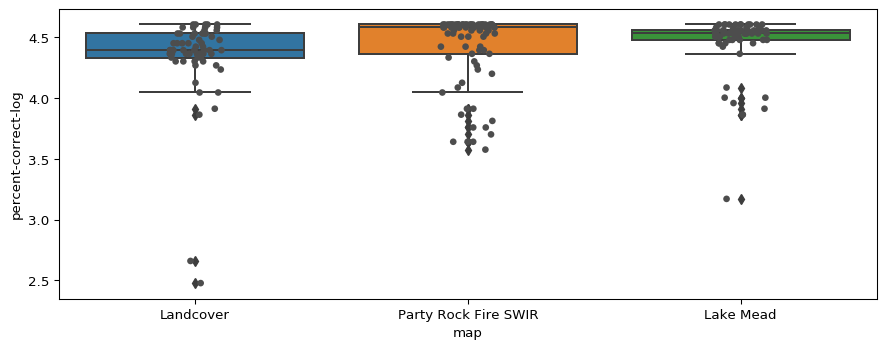

In [17]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='map',y='percent-correct-log', data=df)
sns.stripplot(x='map',y='percent-correct-log', color=".3", data=df)

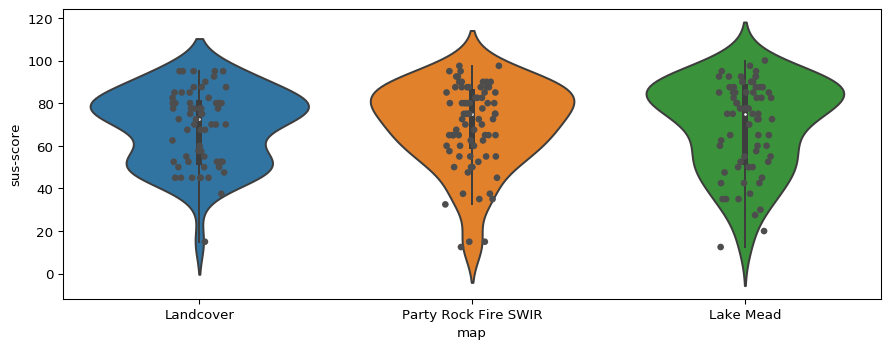

In [18]:
plt.figure(figsize=(11,4), dpi=96)
sns.violinplot(x='map',y='sus-score', data=df)
sns.stripplot(x='map',y='sus-score', color=".3", data=df)

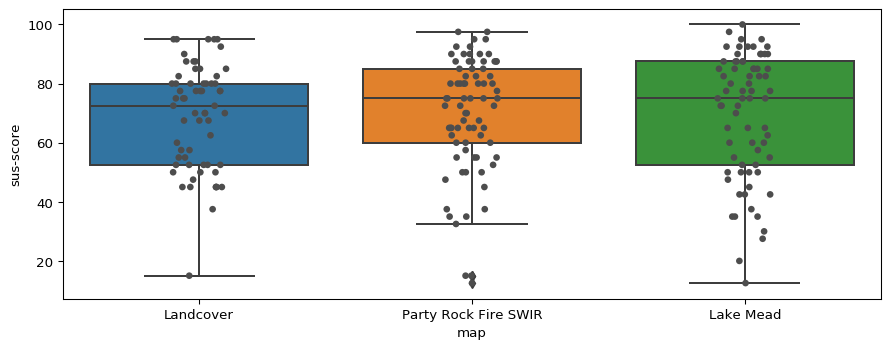

In [19]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='map',y='sus-score', data=df)
sns.stripplot(x='map',y='sus-score', color=".3", data=df)

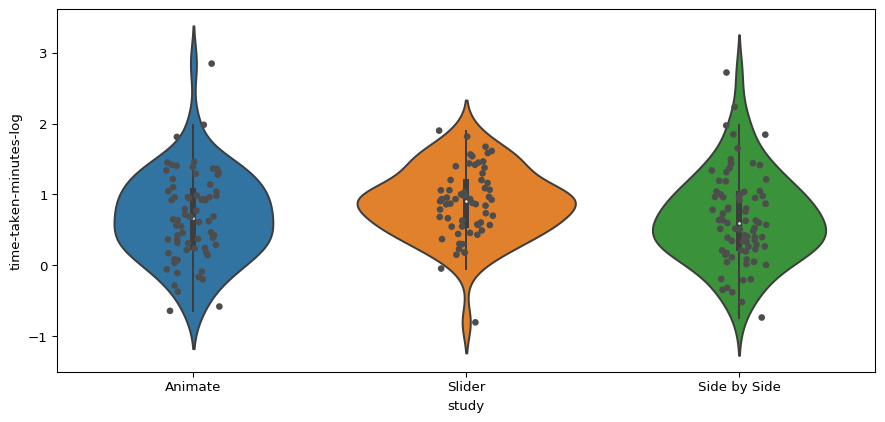

In [20]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='study',y='time-taken-minutes-log', data=df)
sns.stripplot(x='study',y='time-taken-minutes-log', color=".3", data=df)

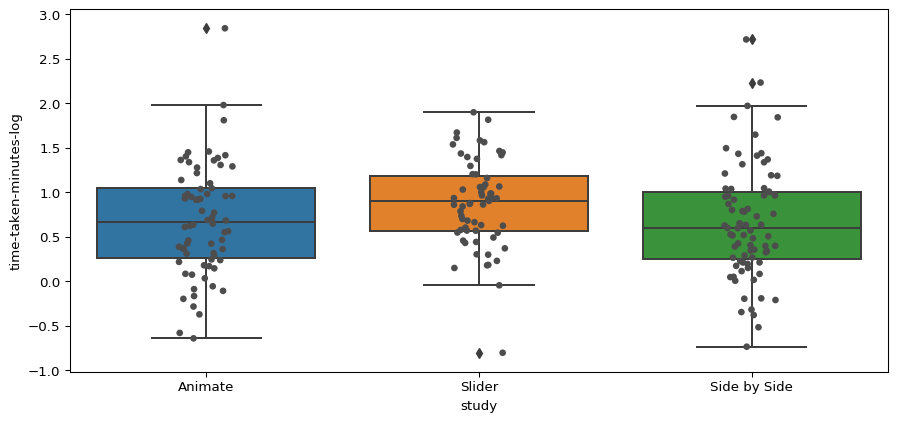

In [21]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='study',y='time-taken-minutes-log', data=df)
sns.stripplot(x='study',y='time-taken-minutes-log', color=".3", data=df)

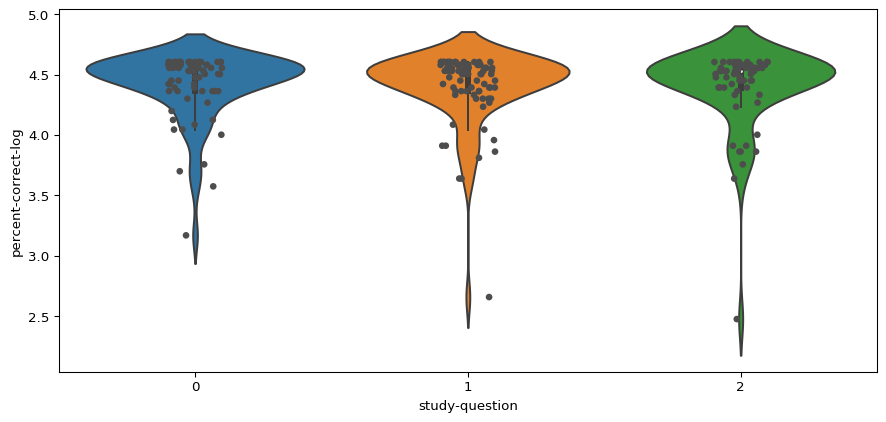

In [22]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='study-question',y='percent-correct-log', data=df)
sns.stripplot(x='study-question',y='percent-correct-log', color=".3", data=df)

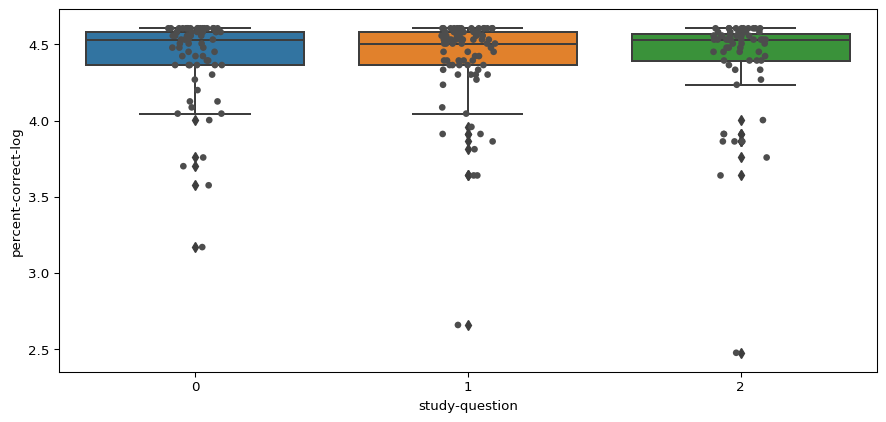

In [23]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='study-question',y='percent-correct-log', data=df)
sns.stripplot(x='study-question',y='percent-correct-log', color=".3", data=df)

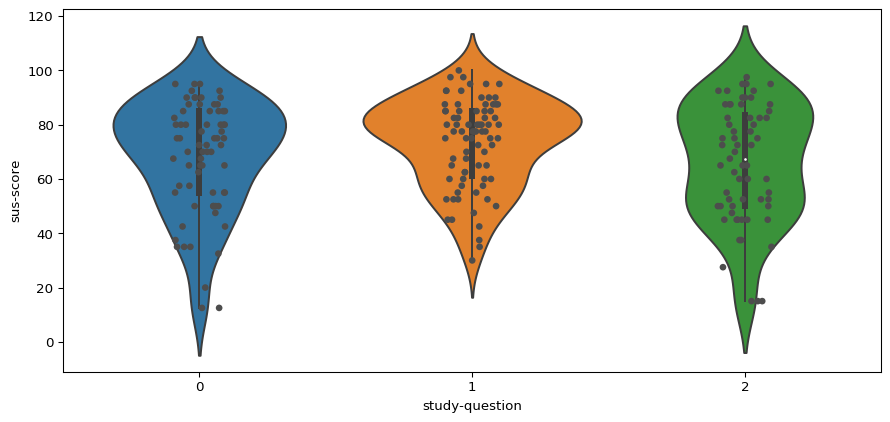

In [24]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='study-question',y='sus-score', data=df)
sns.stripplot(x='study-question',y='sus-score', color=".3", data=df)

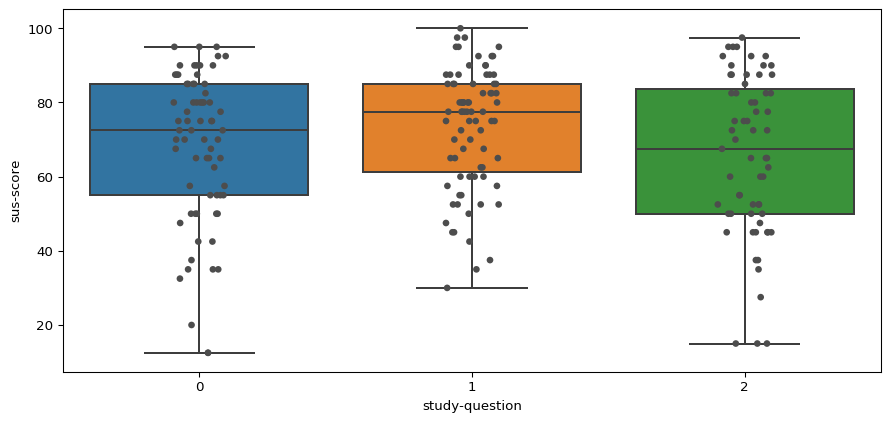

In [25]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='study-question',y='sus-score', data=df)
sns.stripplot(x='study-question',y='sus-score', color=".3", data=df)

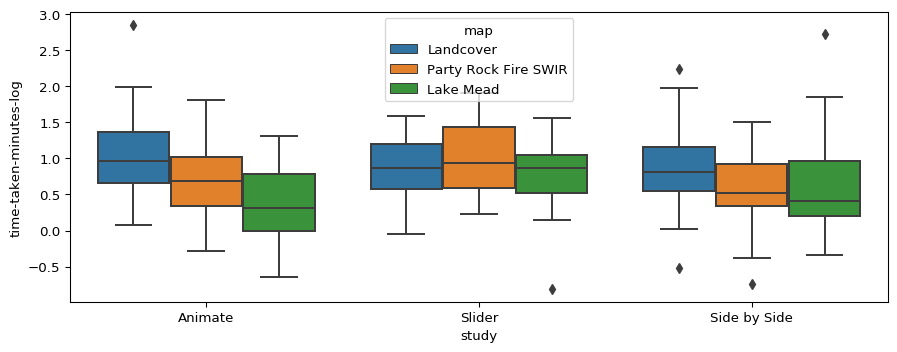

In [26]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='study',y='time-taken-minutes-log', hue='map', data=df)


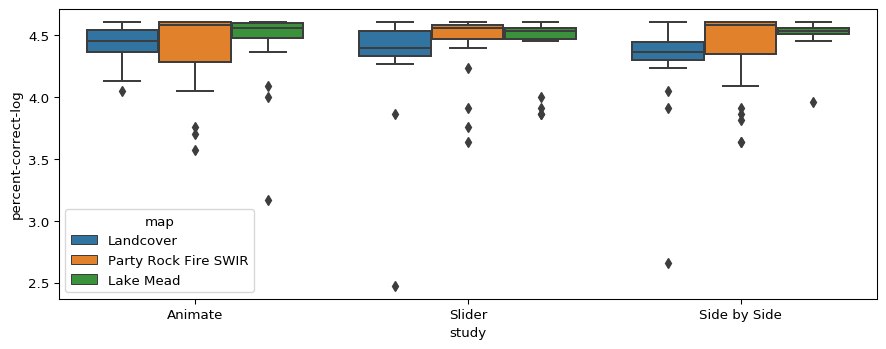

In [27]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='study',y='percent-correct-log', hue='map', data=df)


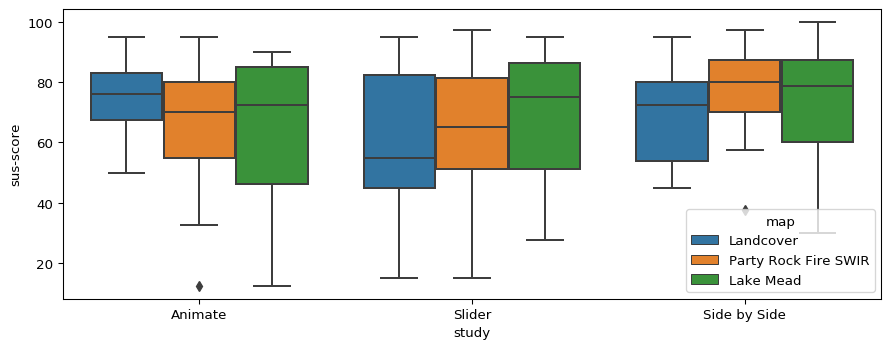

In [28]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='study',y='sus-score', hue='map', data=df)


In [29]:
# import seaborn as sns
# sns.pairplot(df) 
# sns.pairplot(df, hue="study-question")

In [30]:
# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(df)
# g

In [31]:
import researchpy as rp
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [32]:
# df['study'] = df['study-question'].replace({'0': 'Animate', '1': 'Side by Side', '2': 'Slider'})
statdf = df.loc[:, ('study', 'map', 'time-taken-minutes-log', 'percent-correct-log','sus-score')]
statdf = df[['study','sus-score', 'map', 'time-taken-minutes-log', 'percent-correct-log']]
statdf = statdf.rename(columns={'time-taken-minutes-log': 'time', 'sus-score': 'sus', 'percent-correct-log': 'correct'})
statdf


,study,sus,map,time,correct
243,Animate,67.5,Landcover,1.364283,4.478418
242,Slider,70.0,Party Rock Fire SWIR,1.816842,4.605170
241,Side by Side,82.5,Lake Mead,0.961736,4.531062
240,Animate,70.0,Landcover,1.339526,4.125597
239,Slider,72.5,Landcover,0.965659,4.364008
...,...,...,...,...,...
6,Animate,55.0,Party Rock Fire SWIR,1.811265,3.575551
4,Slider,65.0,Lake Mead,0.457509,4.531062
3,Side by Side,90.0,Party Rock Fire SWIR,0.506787,4.556380
2,Side by Side,97.5,Lake Mead,0.783407,4.605170


In [33]:
statdf['both'] = df[['study', 'map']].agg('-'.join, axis=1) 
rp.summary_cont(statdf['time'].groupby(statdf['both']))

,N,Mean,SD,SE,95% Conf.,Interval
both,,,,,,
Animate-Lake Mead,23,0.366498,0.553882,0.115492,0.135045,0.597950
Animate-Landcover,20,1.033927,0.653863,0.146208,0.739914,1.327940
Animate-Party Rock Fire SWIR,27,0.692045,0.525062,0.101048,0.490218,0.893872
Side by Side-Lake Mead,26,0.630101,0.713372,0.139904,0.350460,0.909743
Side by Side-Landcover,26,0.834395,0.643423,0.126186,0.582173,1.086616
Side by Side-Party Rock Fire SWIR,27,0.531433,0.533434,0.102659,0.326388,0.736479
Slider-Lake Mead,23,0.756427,0.500309,0.104322,0.547361,0.965492
Slider-Landcover,17,0.877089,0.462669,0.112214,0.650381,1.103797
Slider-Party Rock Fire SWIR,23,0.995236,0.499480,0.104149,0.786517,1.203955


In [34]:
# time taken statistics
rp.summary_cont(statdf['time'].groupby(statdf['study']))

,N,Mean,SD,SE,95% Conf.,Interval
study,,,,,,
Animate,70,0.682760,0.623334,0.074503,0.535680,0.829840
Side by Side,79,0.663615,0.637804,0.071759,0.522070,0.805161
Slider,63,0.876171,0.493117,0.062127,0.753424,0.998918


In [35]:
# Accuracy statistics
rp.summary_cont(statdf['correct'].groupby(statdf['study']))

,N,Mean,SD,SE,95% Conf.,Interval
study,,,,,,
Animate,70,4.422374,0.272337,0.032550,4.358114,4.486634
Side by Side,79,4.401625,0.301465,0.033917,4.334722,4.468527
Slider,63,4.394894,0.342830,0.043193,4.309556,4.480231


In [36]:
# SUS Score taken statistics
rp.summary_cont(statdf['sus'].groupby(statdf['study']))

,N,Mean,SD,SE,95% Conf.,Interval
study,,,,,,
Animate,70,68.000000,20.401762,2.438477,63.186076,72.813924
Side by Side,79,73.386076,16.261278,1.829537,69.777271,76.994881
Slider,63,65.634921,21.673755,2.730636,60.239884,71.029957


In [37]:
print('Study and Time')

# Time taken statistics
stats_table = rp.summary_cont(statdf['time'].groupby(statdf['study']))

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['time'][statdf['study'] == 'Animate'],
             statdf['time'][statdf['study'] == 'Side by Side'],
             statdf['time'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('time ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['time'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')

# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['time'][statdf['study'] == 'Animate'],
             statdf['time'][statdf['study'] == 'Side by Side'],
             statdf['time'][statdf['study'] == 'Slider']) 
print(levene)

Study and Time


Stats Table
               N      Mean        SD        SE  95% Conf.  Interval
study                                                              
Animate       70  0.682760  0.623334  0.074503   0.535680  0.829840
Side by Side  79  0.663615  0.637804  0.071759   0.522070  0.805161
Slider        63  0.876171  0.493117  0.062127   0.753424  0.998918

oneway Table
F_onewayResult(statistic=2.6238246921161146, pvalue=0.0749131443559982)

ANOVA Table
             sum_sq     df         F    PR(>F)
C(study)   1.848371    2.0  2.623825  0.074913
Residual  73.615744  209.0       NaN       NaN

Tukey adhoc
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
     Animate Side by Side  -0.0191    0.9 -0.2491 0.2108  False
     Animate       Slider   0.1934 0.1481 -0.0499 0.4367  False
Side by Side       Slider   0.2126 0.0881 -0.0241 0.4492  

In [38]:
print('Study and Correctness')

# Correctness taken statistics
stats_table = rp.summary_cont(statdf['correct'].groupby(statdf['study']))

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['correct'][statdf['study'] == 'Animate'],
             statdf['correct'][statdf['study'] == 'Side by Side'],
             statdf['correct'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('correct ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['correct'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')
# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['correct'][statdf['study'] == 'Animate'],
             statdf['correct'][statdf['study'] == 'Side by Side'],
             statdf['correct'][statdf['study'] == 'Slider']) 
print(levene)

Study and Correctness


Stats Table
               N      Mean        SD        SE  95% Conf.  Interval
study                                                              
Animate       70  4.422374  0.272337  0.032550   4.358114  4.486634
Side by Side  79  4.401625  0.301465  0.033917   4.334722  4.468527
Slider        63  4.394894  0.342830  0.043193   4.309556  4.480231

oneway Table
F_onewayResult(statistic=0.15011927902652836, pvalue=0.8606980306605001)

ANOVA Table
             sum_sq     df         F    PR(>F)
C(study)   0.028003    2.0  0.150119  0.860698
Residual  19.493291  209.0       NaN       NaN

Tukey adhoc
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj  lower  upper  reject
--------------------------------------------------------------
     Animate Side by Side  -0.0207   0.9 -0.1391 0.0976  False
     Animate       Slider  -0.0275 0.848 -0.1527 0.0977  False
Side by Side       Slider  -0.0067   0.9 -0.1285  0.115

In [39]:
print('Study and SUS Score')

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['sus'][statdf['study'] == 'Animate'],
             statdf['sus'][statdf['study'] == 'Side by Side'],
             statdf['sus'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')
# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('sus ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('sus ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['sus'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')
# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['sus'][statdf['study'] == 'Animate'],
             statdf['sus'][statdf['study'] == 'Side by Side'],
             statdf['sus'][statdf['study'] == 'Slider']) 
print(levene)

Study and SUS Score
Stats Table
               N      Mean        SD        SE  95% Conf.  Interval
study                                                              
Animate       70  4.422374  0.272337  0.032550   4.358114  4.486634
Side by Side  79  4.401625  0.301465  0.033917   4.334722  4.468527
Slider        63  4.394894  0.342830  0.043193   4.309556  4.480231

oneway Table
F_onewayResult(statistic=3.041041962340092, pvalue=0.04990502398498528)

ANOVA Table
                sum_sq     df         F    PR(>F)
C(study)   2283.548321    2.0  3.041042  0.049905
Residual  78470.077858  209.0       NaN       NaN

ANOVA Table
                sum_sq     df         F    PR(>F)
C(study)   2283.548321    2.0  3.041042  0.049905
Residual  78470.077858  209.0       NaN       NaN

Tukey adhoc
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
     

In [40]:
time_results = ols('time ~ C(study)', data=statdf).fit()
time_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     2.624
Date:                Sat, 29 Feb 2020   Prob (F-statistic):             0.0749
Time:                        09:28:26   Log-Likelihood:                -188.70
No. Observations:                 212   AIC:                             383.4
Df Residuals:                     209   BIC:                             393.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.6828      0.071      9.625      0.000       0.543       0.823
C(study)[T.Side by Side]    -0.0191      0.097     -0.197      0.844      -0.211       0.173
C(study)[T.Slider]           0.1934      0.103      1.877      0.062      -0.010       0.397
==============================================================================
Omnibus:                        9.573   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.711
Skew:                           0.352   Prob(JB):                      0.00286
Kurtosis:                       3.910   Cond. No.                         3.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 1248x480 with 0 Axes>

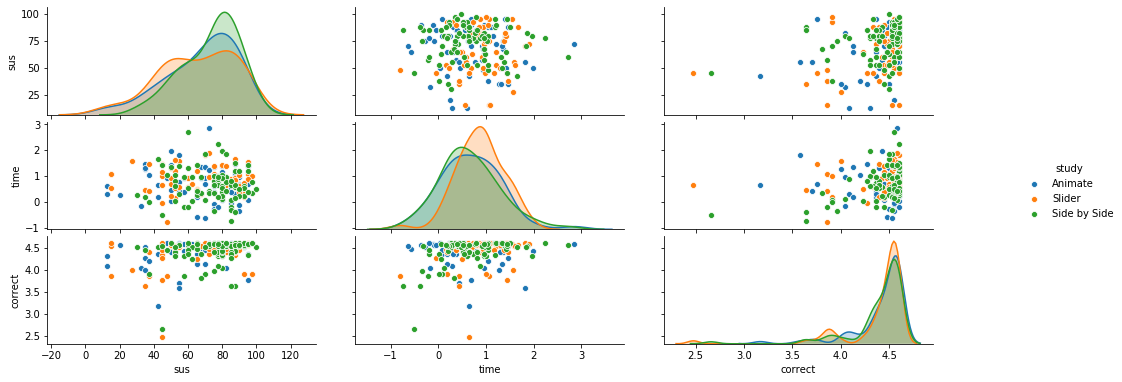

In [41]:
plt.figure(figsize=(13,5), dpi=96)
g = sns.pairplot(statdf, hue="study")
g.fig.set_figheight(5)
g.fig.set_figwidth(16)
g      

<Figure size 1248x480 with 0 Axes>

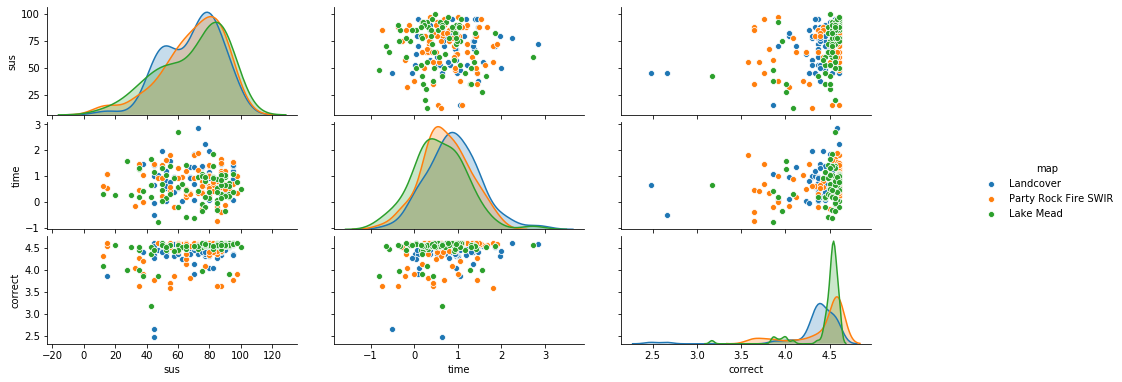

In [42]:
plt.figure(figsize=(13,5), dpi=96)
g = sns.pairplot(statdf, hue="map")
g.fig.set_figheight(5)
g.fig.set_figwidth(16)
g      

<Figure size 1248x480 with 0 Axes>

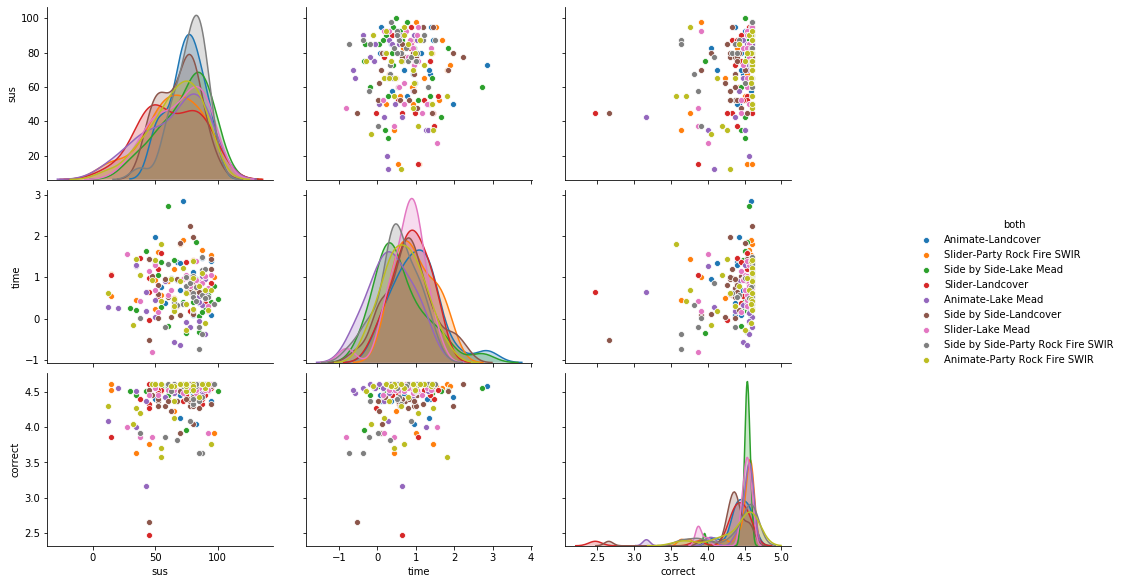

In [43]:
plt.figure(figsize=(13,5), dpi=96)
g = sns.pairplot(statdf, hue="both")
g.fig.set_figheight(8)
g.fig.set_figwidth(16)
g